In [38]:
import numpy as np
import matplotlib.pyplot as plt

####  벡터/행렬의 덧셈과 뺄셈

같은 크기를 가진 두 개의 벡터나 행렬은 덧셈과 뺄셈을 할 수 있다. 두 벡터와 행렬에서 같은 위치에 있는 원소끼리 덧셈과 뺄셈을 하면 된다. 이러한 연산을 __요소별(element-wise)연산__ 이라고 한다.

In [39]:
x = np.array([10,11,12,13,14])
y = np.array([0,1,2,3,4])

x + y

array([10, 12, 14, 16, 18])

In [40]:
x - y

array([10, 10, 10, 10, 10])

In [41]:
np.array([[5,6],[7,8]]) + np.array([[10,20],[30,40]]) - \
    np.array([[1,2],[3,4]])

array([[14, 24],
       [34, 44]])

#### 브로드 캐스팅

원래 덧셈과 뺄셈은 크기(차원)가 같은 두 벡터에 대해서만 할 수 있다. 하지만 벡터와 스칼라의 경우에는 관례적으로 다음처럼 1-벡터를 사용하여 스칼라를 벡터로 변환한 연산을 허용한다 이를 __브로드캐스팅(broadcasting)__ 이라고 한다.

$\begin{align}
\begin{bmatrix}
10 \\
11 \\
12 \\
\end{bmatrix}
- 10
=
\begin{bmatrix}
10 \\
11 \\
12 \\
\end{bmatrix}
- 10\cdot \mathbf{1}
=
\begin{bmatrix}
10 \\
11 \\
12 \\
\end{bmatrix}
-
\begin{bmatrix}
10 \\
10 \\
10 \\
\end{bmatrix}
\tag{2.2.7}
\end{align}$

데이터 분석에서는 원래의 데이터 x가 아니라 그 데이터 벡터의 각 원소의 평균값을 뺀 __평균제거(mean removed) 벡터__ 를 사용하는 경우가 많다.

$\begin{align}
x = 
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_N
\end{bmatrix}
\;\; \rightarrow \;\;
x - m =
\begin{bmatrix}
x_1 - m\\
x_2 - m \\
\vdots \\
x_N - m
\end{bmatrix}
\tag{2.2.8}
\end{align}$

위 식에서 m 은 샘플 평균이다.
$\begin{align}
m = \dfrac{1}{N}\sum_{i=1}^N x_i
\tag{2.2.9}
\end{align}$

In [43]:
x = np.array([[1],[2],[3]])
y = np.array([[4],[5],[6]])

x.T @ y # 또는 np.dot(x.T,y)

array([[32]])

In [44]:
x = np.array([1,2,3])
y = np.array([4,5,6])

x @ y # 또는 np.dot(x,y)

32

###  가중합

벡터의 내적은 가중합을 계산할 때 쓰일 수 있다. __가중합(weighted sum)__ 이란 복수의 데이터를 단순히 합하는 것이 아니라 각각의 수에 어떤 가중치 값을 곱한 후 이 곱셈 결과들을 다시 합한 것을 말한다.
$\begin{align}
w_1 x_1 + \cdots + w_N x_N = \sum_{i=1}^N w_i x_i 
\tag{2.2.25}
\end{align}$

####  가중 평균

가중합의 가중치값을 전체 가중치값의 합으로 나누면 __가중평균(weighted average)__ 이 된다.

$\begin{align}
\bar{x} = \dfrac{1}{N}\sum_{i=1}^N x_i = \dfrac{1}{N} \mathbf{1}_N^T x
\tag{2.2.31}
\end{align}$

In [46]:
x = np.arange(10)
N = len(x)

np.ones(N) @ x / N

4.5

In [47]:
x.mean()

4.5

####  유사도

벡터의 곱셈(내적)은 두 벡터 간의 유사도를 계산하는 데도 이용할 수 있다. __유사도(similarity)는 두 벡터가 닮은 정도를 정량적으로 나타낸 값__ 으로 두 벡터가 비슷한 경우에는 유사도가 커지고 비슷하지 않은 경우에는 유사도가 작아진다. 내적을 이용하면 __코사인 유사도(cosine similarity)__ 라는 유사도를 계산할 수 있다

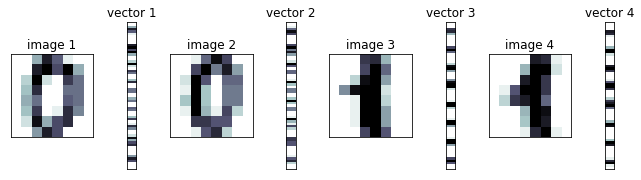

In [49]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
d1 = digits.images[0]
d2 = digits.images[10]
d3 = digits.images[1]
d4 = digits.images[11]
v1 = d1.reshape(64,1)
v2 = d2.reshape(64,1)
v3 = d3.reshape(64,1)
v4 = d4.reshape(64,1)

plt.figure(figsize=(9,9))
gs = gridspec.GridSpec(1,8, height_ratios=[1],
                      width_ratios=[9,1,9,1,9,1,9,1])

for i in range(4):
    plt.subplot(gs[2*i])
    plt.imshow(eval('d' + str(i+1)), aspect=1,
              interpolation='nearest',cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('image {}'.format(i+1))
    plt.subplot(gs[2 * i + 1])
    plt.imshow(eval('v' + str(i+1)), aspect=0.25,
              interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.title('vector {}'.format(i+1))
plt.tight_layout()
plt.show()

In [50]:
(v1.T @ v2)[0][0], (v3.T@v4)[0][0]

(3064.0, 3661.0)

In [51]:
(v1.T @ v3)[0][0], (v3.T@v4)[0][0],(v2.T @ v3)[0][0], (v2.T@v4)[0][0]

(1866.0, 3661.0, 2421.0, 2479.0)

####  선형회귀 모형

__선형회귀 모형(linear regression model)__ 이란 독립변수 x에서 종속변수 y를 예측하는 방법의 하나로 독립변수 벡터 x와 가중치 벡터w 와의 가중합으로 y에 대한 예측값 y_hat를 계산하는 수식을 말한다 

$\begin{align}
\hat{y} = w_1 x_1 + \cdots + w_N x_N
\tag{2.2.33}
\end{align}$

### 제곱합

데이터의 분산(variance)이나 표준 편차(standard deviation)등을 구하는 경우에는 각각의 데이터를 제곱한 뒤 이 값을 모두 더한 __제곱합(sum of squares)__ 을 계산해야 한다. 이 경우에도 벡터의 내적을 사용하여 $x^T x$ 로 쓸 수 있다.



$\begin{align}
x^T x = 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N} 
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix} = \sum_{i=1}^{N} x_i^2
\tag{2.2.38}
\end{align}$

#### 행렬과 행렬의 곱셈

벡터의 곰셈을 정의한 후에는 이를 이용하여 행렬의 곱셈을 정의할 수 있다. 행렬과 행렬을 곱하면 행렬이 된다. 방법은 다음과 같다.
$\begin{align}
C = AB \; \rightarrow \; c_{ij} = a_i^T b_j 
\tag{2.2.39}
\end{align}$

$\begin{align}
A \in \mathbf{R}^{N \times L} , \; B \in \mathbf{R}^{L \times M} \;  \rightarrow \; AB \in \mathbf{R}^{N \times M} 
\end{align}$

In [4]:
import numpy as np
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[1,2],[3,4],[5,6]])
C = A @ B
C

array([[22, 28],
       [49, 64]])

#### 교환 법칙과 분배 법칙

행렬의 곱셈은 곱하는 행렬의 순서를 바꾸는 교환법칙이 성립하지 않는다. 그러나 덧셈에 대한 분배 법칙은 성립한다

$\begin{align}
AB \neq BA  
\tag{2.2.53}
\end{align}$

In [5]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
C = np.array([[9,8],[7,6]])

In [6]:
A @ B

array([[19, 22],
       [43, 50]])

In [7]:
B @ A

array([[23, 34],
       [31, 46]])

In [8]:
A @ (B + C)

array([[42, 42],
       [98, 98]])

In [9]:
A @ B + A @ C

array([[42, 42],
       [98, 98]])

In [10]:
(A + B) @ C

array([[110,  96],
       [174, 152]])

#### 열 벡터의 선형 조합

$\begin{align}
(ABC)^T = C^T B^T A^T 
\tag{2.2.61}
\end{align}$

$\begin{align}
\boxed{\begin{matrix} 
\phantom{} & \phantom{} & \phantom{} & \phantom{} & \phantom{} \\ 
& & M & &\\ 
\phantom{} & \phantom{} & \phantom{} & \phantom{} & \phantom{} \\ 
\end{matrix}} \,
\boxed{\begin{matrix} \phantom{\LARGE\mathstrut} \\ v \\ \phantom{\LARGE\mathstrut} \end{matrix}}
=
\boxed{\begin{matrix} 
\phantom{} \\ 
Mv \\ 
\phantom{}  
\end{matrix}}
\tag{2.2.71}
\end{align}$

벡터의 선형조합은 다양한 분야에 응용된다. 예를 들어 두 이미지 벡터의 선형조합은 두 이미지를 섞어놓은 모핑(morphing) 효과를 얻는 데 사용 할 수 있다.

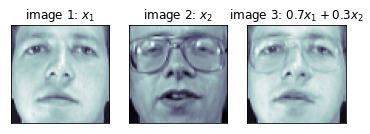

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

f, ax = plt.subplots(1, 3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1: $x_1$")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2: $x_2$")

new_face = 0.7 * faces.images[6] + 0.3 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3: $0.7x_1 + 0.3x_2$")

plt.show()

#### 여러 개의 벡터에 대한 가중합 동시 계산

벡터 하나의 가중합은 $w^Tx$ 또는 $x^Tw$ 로 표시할 수 있다는것을 배웠다. 그런데 만약 이렇게 w 가중치를 사용한 가중합을 하나의 벡터 x가 아니라 여러 벡터 $x1, ... , x_m $ 개에 대해서 모두 계산해야 한다면 어떻게 해야할까? 예를 들어 위와 같이 선형 회귀 모형을 사용하여 여러 데이터 $ x_1, x_2, x_3, \cdots, x_N $ 개의 데이터 모두에 대해 예측값 $ y_1, y_2, y_3, \cdots, y_N $ 을 한꺼번에 계산하고 싶다면 다음처럼 데이터 행렬 X를 사용하여 $\hat{y} = Xw$ 라는 수식으로 간단하게 표시할 수 있다.

$\begin{align}
\begin{aligned}
\hat{y} = 
\begin{bmatrix}
\hat{y}_1 \\
\hat{y}_2 \\
\vdots \\
\hat{y}_M \\
\end{bmatrix}
&= 
\begin{bmatrix}
w_1 x_{1,1} + w_2 x_{1,2} + \cdots + w_N x_{1,N} \\
w_1 x_{2,1} + w_2 x_{2,2} + \cdots + w_N x_{2,N} \\
\vdots  \\
w_1 x_{M,1} + w_2 x_{M,2} + \cdots + w_N x_{M,N} \\
\end{bmatrix}
\\
&= 
\begin{bmatrix}
x_{1,1} & x_{1,2} & \cdots & x_{1,N} \\
x_{2,1} & x_{2,2} & \cdots & x_{2,N} \\
\vdots  & \vdots  & \vdots & \vdots \\
x_{M,1} & x_{M,2} & \cdots & x_{M,N} \\
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2 \\ \vdots \\ w_N
\end{bmatrix}
\\
&= 
\begin{bmatrix}
x_1^T \\
x_2^T \\
\vdots \\
x_M^T \\
\end{bmatrix}
\begin{bmatrix}
w_1 \\ w_2 \\ \vdots \\ w_N
\end{bmatrix}
\\
&= X w
\end{aligned}
\tag{2.2.76}
\end{align}$

$\begin{align}
\hat{y} = Xw  
\tag{2.2.77}
\end{align}$

### 잔차

선형 회귀분석(linear regression) 을 한 결과는 가중치 벡터 w라는 형태로 나타나고 예측치는 이 가중치 벡터를 사용한 독립변수 데이터 레코드 즉, 벡터 x_i의 가중합 $w^Tx_i$이 된다고 했다. 예측치와 실제값 $y_i$의 차이를 __오차(error) 혹은 잔차(residual) $e_i$__ 라고 한다. 이러한 잔찻값을 모든 독립변수 벡터에 대해 구하면 잔차 벡터 e가 된다.

$\begin{align}
e_i = y_i - \hat{y}_i  = y_i - w^Tx_i 
\tag{2.2.80}
\end{align}$

잔차 벡터는 다음처럼 $y-X_w$ 로 간단하게 표기할 수 있다.
$\begin{align}
\begin{aligned}
e 
&=
\begin{bmatrix}
e_{1} \\
e_{2} \\
\vdots \\
e_{M} \\
\end{bmatrix}
\\ 
&=
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{M} \\
\end{bmatrix}
-
\begin{bmatrix}
x^T_{1}w \\
x^T_{2}w \\
\vdots \\
x^T_{M}w \\
\end{bmatrix}
\\ 
&= y - Xw
\end{aligned}
\tag{2.2.81}
\end{align}$

$e = y-Xw$

### 잔차 제곱합

잔차의 크기는 잔차 벡터의 각 원소를 제곱한 후 더한 __잔차 제곱합(RSS: residual Sum of Sqares)__ 을 이용하여 구한다. 이 값은 $e^Te$로 간단하게 쓸 수 있으며 그 값은 다음처럼 계산한다.
$\begin{align}
\sum_{i=1}^{N} e_i^2 = \sum_{i=1}^{N} (y_i - w^Tx_i)^2 = e^Te =  (y - Xw)^T (y - Xw) 
\tag{2.2.83}
\end{align}$

### 이차형식

정방행렬 $X^TX$를 $A$라고 이름붙이면 마지막 항은 $w^TAw$ 와 같은 형태가 된다

벡터의 __이차형식(Quadratic Form)__ 이란 이처럼 어떤 벡터와 정방행렬이 '행벡터 x 정방행렬 x 열벡터' 의 형식으로 되어있는 것을 말한다.


\begin{align}
\begin{aligned}
x^T A x 
&= 
\begin{bmatrix}
x_{1} & x_{2} & \cdots & x_{N} 
\end{bmatrix}
\begin{bmatrix}
a_{1,1} & a_{1,2} & \cdots & a_{1,N} \\
a_{2,1} & a_{2,2} & \cdots & a_{2,N} \\
\vdots & \vdots & \ddots & \vdots \\
a_{N,1} & a_{N,2} & \cdots & a_{N,N} \\
\end{bmatrix}
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{N} \\
\end{bmatrix} 
\\
&= \sum_{i=1}^{N} \sum_{j=1}^{N} a_{i,j} x_i x_j 
\end{aligned}
\tag{2.2.85}
\end{align}

In [18]:
x = np.array([1,2,3])
x

array([1, 2, 3])

In [19]:
A = np.arange(1,10).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [20]:
x.T @ A @ x

228

#### 부분행렬

다음과 같은 2차원 정방행렬 A,B가 있다.

\begin{align}
A = 
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
,\;\;
B = 
\begin{bmatrix}
b_{11} & b_{12} \\
b_{21} & b_{22}
\end{bmatrix}
\tag{2.2.90}
\end{align}

이 때 두 행렬의 곱 AB는 A,B의 __부분행렬(submatrix)__ 을 이용하여 여러 방법으로 계산할 수 있다.

(1) 우선 앞에 곱해지는 행렬을 행벡터로 나누어 계산해도 된다.

$\begin{align}
A = 
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{} & a_1^T & \phantom{} \end{matrix}} \\ 
\boxed{\begin{matrix} \phantom{} & a_2^T & \phantom{} \end{matrix}} \\ 
\end{bmatrix}
\tag{2.2.91}
\end{align}$

즉,
$\begin{align}
a_1^T = 
\begin{bmatrix}
a_{11} & a_{12} 
\end{bmatrix}
,\;\;
a_2^T = 
\begin{bmatrix}
a_{21} & a_{22} 
\end{bmatrix}
\tag{2.2.92}
\end{align}$

이면

$\begin{align}
AB 
=
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{} & a_1^T & \phantom{} \end{matrix}} \\ 
\boxed{\begin{matrix} \phantom{} & a_2^T & \phantom{} \end{matrix}} \\ 
\end{bmatrix}
B
=
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{} & a_1^TB & \phantom{} \end{matrix}} \\ 
\boxed{\begin{matrix} \phantom{} & a_2^TB & \phantom{} \end{matrix}} \\ 
\end{bmatrix} 
\tag{2.2.93}
\end{align}$

(2) 아니면 뒤에 곱해지는 행렬을 열벡터로 나누어 계산해도 된다.

$\begin{align}
B = 
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{\mathstrut} \\ b_1 \\ \phantom{\mathstrut} \end{matrix}} \!\!\!\! &
\boxed{\begin{matrix} \phantom{\mathstrut} \\ b_2 \\ \phantom{\mathstrut} \end{matrix}} 
\end{bmatrix}
\tag{2.2.94}
\end{align}$

즉 , 

$\begin{align}
b_1 = 
\begin{bmatrix}
b_{11} \\
b_{21} \\
\end{bmatrix}
,\;\;
b_2 = 
\begin{bmatrix}
b_{21} \\
b_{22}
\end{bmatrix}
\tag{2.2.95}
\end{align}$

이면,

$\begin{align}
AB 
=
A
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{\mathstrut} \\ b_1 \\ \phantom{\mathstrut} \end{matrix}} \!\!\!\! & 
\boxed{\begin{matrix} \phantom{\mathstrut} \\ b_2 \\ \phantom{\mathstrut} \end{matrix}}
\end{bmatrix}
=
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{\mathstrut} \\ Ab_1 \\ \phantom{\mathstrut} \end{matrix}} \!\!\!\! &
\boxed{\begin{matrix} \phantom{\mathstrut} \\ Ab_2 \\ \phantom{\mathstrut} \end{matrix}}
\end{bmatrix}
\tag{2.2.96}
\end{align}$

(3) 앞에 곱해지는 행렬을 열벡터로, 뒤에 곱해지는 행렬을 행벡터로 나누어 스칼라처럼 계산해도 된다.

$\begin{align}
AB 
=
\begin{bmatrix}
a_1 & a_2
\end{bmatrix}
\begin{bmatrix}
b_1^T \\ b_2^T
\end{bmatrix}
=
a_1b_1^T + a_2b_2^T
\tag{2.2.97}
\end{align}$

벡터의 크기를 직사각형으로 표시하면 다음과 같다
$\begin{align}
AB 
=
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{\mathstrut} \\ a_1 \\ \phantom{\mathstrut} \end{matrix}}  \!\!\!\!& 
\boxed{\begin{matrix} \phantom{\mathstrut} \\ a_2 \\ \phantom{\mathstrut} \end{matrix}}  \!
\end{bmatrix}
\begin{bmatrix}
\boxed{\begin{matrix} \phantom{} & b_1^T & \phantom{} \end{matrix}} \\ 
\boxed{\begin{matrix} \phantom{} & b_2^T & \phantom{} \end{matrix}} \\ 
\end{bmatrix}
=
\boxed{\begin{matrix} \phantom{\mathstrut} \\ a_1 \\ \phantom{\mathstrut} \end{matrix}} 
\boxed{\begin{matrix} \phantom{} & b_1^T & \phantom{} \end{matrix}} 
+
\boxed{\begin{matrix} \phantom{\mathstrut} \\ b_1 \\ \phantom{\mathstrut} \end{matrix}} 
\boxed{\begin{matrix} \phantom{} & b_2^T & \phantom{} \end{matrix}} 
\tag{2.2.98}
\end{align}$

## 2.3 행렬의 성질

행렬은 여러 개의 숫자로 이루어져 있으므로 실수처럼 부호나 크기를 정의하기 어렵다.
하지만 부호/크기와 유사한 개념은 정의할 수 있다. 여기에서는 이러한 개념을 살펴본다.

### 정부호와 준정부호

영 벡터가 아닌 모든 벡터 x에 대해 다음 부등식이 성립하면 행렬 A가 __양의 정부호(positive defintie)__ 라고 한다.



###  행렬 놈

행렬의 __놈(norm)__ 은 행렬 A에 대해 다음 식으로 정의되는 숫자다. 보통 $||A||_p$ 로 표기한다. 이 식에서 $a_ij$는 행렬 A의 i번째 행 j번째 열의 원소이다.

$\begin{align}
\Vert A \Vert_p = \left( \sum_{i=1}^N \sum_{j=1}^M |a_{ij}|^p \right)^{1/p}  
\tag{2.3.8}
\end{align}$

#### 놈은 항상 0보다 같거나 크다

놈은 모든 크기의 행렬에 대해서 정의할 수 있으므로 벡터에 대해서도 정의할 수 있다. 벡터의 놈에서 중요한 성질은 __벡터의 놈의 제곱이 벡터의 제곱합과 같다__ 는 것이다.

__놈을 최소화하는 것은 벡터의 제곱합을 최소화하는 것__ 과 같다.

In [1]:
import numpy as np

A = (np.arange(9) - 4).reshape((3,3))
A

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [2]:
np.linalg.norm(A)

7.745966692414834

In [4]:
A = (np.arange(4) -2).reshape((2,2))
A

array([[-2, -1],
       [ 0,  1]])

In [5]:
A_1 = np.array([[-2,-1],[0,1]])
A_1

array([[-2, -1],
       [ 0,  1]])

In [7]:
A_1 @ A.T

array([[ 5, -1],
       [-1,  1]])

### 대각합

__대각합(trace)__ 은 정방해열ㄹ에 대해서만 정의되며 다음처럼 대각원소의 합으로 계산된다. 대각합을 구할 때는 절대값읠 취하거나 제곱을 하지 않기 때문에 대각합의 값은 놈과 달리 __음수__ 가 될 수 있다.

In [8]:
np.trace(A_1)

-1

In [9]:
np.trace(np.eye(3))

3.0

In [12]:
x = np.array([[1],[2]])

In [13]:
x

array([[1],
       [2]])

In [14]:
y = np.arange(4).reshape((2,2))

In [15]:
y

array([[0, 1],
       [2, 3]])

In [16]:
x.T@y@x

array([[18]])

In [20]:
np.linalg.norm(y)**2

14.0

In [19]:
np.trace(y.T@y)

14

#### 행렬식

정방행렬 A의 __행렬식(determinant)은 det(A), detA, 또는 |A|__ 라는 기호로 표기한다.

In [21]:
A = np.array([[2,-1,0],[-1,2,-1],[0,-1,2]])

In [22]:
A

array([[ 2, -1,  0],
       [-1,  2, -1],
       [ 0, -1,  2]])

In [23]:
np.linalg.det(A)

4.0

### 역행렬

정방행렬 A에 대한 __역행렬__ $A^-1$ 은 원래의 행렬 A와 다음 관계를 만족하는 정방행렬을 말한다.

역행렬은 항상 존재하는 것이 아니라 __행렬 A에 따라서는 존재하지 않을 수도 있다.__ 역행렬이 존재하는 행렬을 __가역행렬(invertible matrix), 역행렬이 존재하지 않는 행렬을 특이행렬(singular matrix)__ 라고 한다

#### 역행렬에 대한 정리

역행렬에 대한 몇가리 정리


#### 셔먼-모리슨 공식

정방행렬 A와 벡터 u,v 에 대해 다음 공식이 성립한다.

\begin{align}
(A+uv^T)^{-1} = A^{-1} - {A^{-1}uv^T A^{-1} \over 1 + v^T A^{-1}u} 
\tag{2.4.21}
\end{align}

#### 우드베리 공식

정방행렬 A와 이에 대응하는 적절한 크기의 행렬 U,V,C에 대해 다음 공식이 성립한다.

$\begin{align}
\left(A+UCV \right)^{-1} = A^{-1} - A^{-1}U \left(C^{-1}+VA^{-1}U \right)^{-1} VA^{-1} 
\tag{2.4.22}
\end{align}$

In [24]:
import numpy as np

A = np.array([[1,1,0],[0,1,1],[1,1,1]])
A

array([[1, 1, 0],
       [0, 1, 1],
       [1, 1, 1]])

In [25]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0., -1.,  1.],
       [ 1.,  1., -1.],
       [-1.,  0.,  1.]])

In [26]:
b = np.array([[2],[2],[3]])
b

array([[2],
       [2],
       [3]])

In [27]:
x = Ainv @ b
x

array([[1.],
       [1.],
       [1.]])

In [28]:
A @ x - b

array([[0.],
       [0.],
       [0.]])

In [34]:
x, resid, rank , s = np.linalg.lstsq(A,b)
s

C:\Users\82109\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([2.41421356, 1.        , 0.41421356])

In [35]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target
A = X[:4, [0, 4, 5, 6]]  # 'CRIM', 'NOX', 'RM', 'AGE'
b = y[:4]

In [36]:
Ainv = np.linalg.inv(A)

In [39]:
x = np.dot(Ainv,b)

In [42]:
print(x)

[-3.12710043e+02 -1.15193942e+02  1.44996465e+01 -1.13259317e-01]


### 최소자승문제

선형 연립방정식의 해가 존재하지 않는다면 선형 예측모형은 어떻게 구할까?

__양변이 정확히 똑같지 않아도 된다면__ 비슷한 값 예측가능

$e = Ax - b$

잔차는 벡터이므로 최소자승문제에서는 벡터의 크기 중에서 __벡터의 놈(norm)을 최소화__ 하는 문제를 푼다. 앞 절에서 놈을 최소화하는 것은 놈의 제곱을 최소화 하는 것과 같다고 했다. 여기에서 잔차 제곱합이 놈의 제곱이 된다.

$e^Te = ||e||^2 = (Ax-b)^T(Ax-b)$

$\begin{align}
x = \text{arg} \min_x e^Te = \text{arg} \min_x  \; (Ax-b)^T(Ax-b)  
\tag{2.4.41}
\end{align}$

위 식에서 argmin_xf(x)는 함수 f(x)를 가장 작게 만드는 x값을 의미한다. 이러한 문제를 __최소자승문제(least square problem)__ 라고 한다.
$A^TA$ 가 항상 정방 행렬이 된다는 점을 이용하여 다음과 같이 최소 자승 문제의 답이 어떤 형태가 되는지 살펴보자

$\begin{align}
x = ((A^TA)^{-1}A^T) b  
\tag{2.4.45}
\end{align}$

여기서 행렬 $(A^TA)^{-1}A^T$ 를 행렬 A의 __의사역행렬(pseudo inverse)__ 이라고 하며 다음처럼 $A^+$ 로 표기한다.

$\begin{align}
A^{+} = (A^TA)^{-1}A^T 
\tag{2.4.46}
\end{align}$

In [51]:
A = np.array([[1,1,0],[0,1,1],[1,1,1],[1,1,2]])
A

array([[1, 1, 0],
       [0, 1, 1],
       [1, 1, 1],
       [1, 1, 2]])

In [52]:
b = np.array([[2],[2],[3],[4.1]])

In [53]:
b

array([[2. ],
       [2. ],
       [3. ],
       [4.1]])

In [54]:
Apinv = np.linalg.inv(A.T@ A) @ A.T
Apinv

array([[ 0.33333333, -1.        ,  0.33333333,  0.33333333],
       [ 0.5       ,  1.        ,  0.        , -0.5       ],
       [-0.5       ,  0.        ,  0.        ,  0.5       ]])

In [56]:
x = Apinv @ b
x

array([[1.03333333],
       [0.95      ],
       [1.05      ]])

In [58]:
A @ x

array([[1.98333333],
       [2.        ],
       [3.03333333],
       [4.08333333]])

In [59]:
x, resid, rank, s = np.linalg.lstsq(A,b)
x

C:\Users\82109\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


array([[1.03333333],
       [0.95      ],
       [1.05      ]])

In [60]:
resid , np.linalg.norm(A@x-b) ** 2

(array([0.00166667]), 0.0016666666666666698)

### 벡터의 기하학적 의미

N 차원 벡터 a 는 N 차원의 공간에서
- 벡터 a의 값으로 표시되는 __점__ 또는
- 원점과 벡터 a의 값으로 표시되는 점을 연결한 __화살표__

라고 생각할 수 있다.

In [61]:
import numpy as np
import matplotlib.pylab as plt

plt.rc("font", size=18)  # 그림의 폰트 크기를 18로 고정
gray = {"facecolor": "gray"}
black = {"facecolor": "black"}
red = {"facecolor": "red"}
green = {"facecolor": "green"}
blue = {"facecolor": "blue"}

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54665 missing from cur

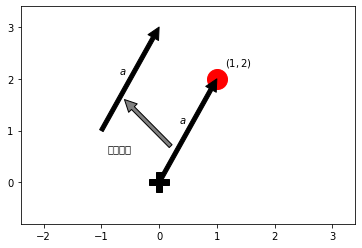

In [62]:
a = np.array([1, 2])
plt.plot(0, 0, 'kP', ms=20)
plt.plot(a[0], a[1], 'ro', ms=20)
plt.annotate('', xy=[-0.6, 1.6], xytext=(0.2, 0.7), arrowprops=gray)
plt.annotate('', xy=a, xytext=(0, 0), arrowprops=black)
plt.annotate('', xy=a + [-1, 1], xytext=(-1, 1), arrowprops=black)
plt.text(0.35, 1.15, "$a$")
plt.text(1.15, 2.25, "$(1,2)$")
plt.text(-0.7, 2.1, "$a$")
plt.text(-0.9, 0.6, "평행이동")
plt.xticks(np.arange(-2, 4))
plt.yticks(np.arange(-1, 4))
plt.xlim(-2.4, 3.4)
plt.ylim(-0.8, 3.4)
plt.show()

#### 벡터의 길이

벡터 a의 길이는 놈(norm) ||a|| 으로 정의한다.
$\begin{align}
\| a \| = \sqrt{a^T a } = \sqrt{a_1^2 + \cdots + a_N^2}
\tag{3.1.2}
\end{align}$

In [63]:
a = np.array([1,2])
np.linalg.norm(a)

2.23606797749979

#### 스칼라와 벡터의 곱

양의 실수와 벡터를 곱하면 벡터의 방향은 변하지 않고 실수의 크기만큼 벡터의 길이가 커진다. 만약 음의 실수를 곱하면 벡터의 방향이 반대가 된다.


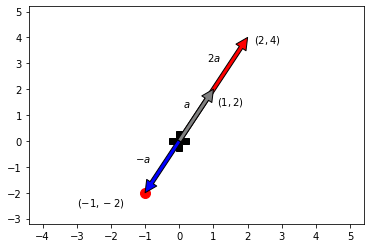

In [64]:
a = np.array([1, 2])
b = 2 * a
c = -a
plt.annotate('', xy=b, xytext=(0, 0), arrowprops=red)
plt.text(0.8, 3.1, "$2a$")
plt.text(2.2, 3.8, "$(2, 4)$")
plt.annotate('', xy=a, xytext=(0, 0), arrowprops=gray)
plt.text(0.1, 1.3, "$a$")
plt.text(1.1, 1.4, "$(1, 2)$")
plt.plot(c[0], c[1], 'ro', ms=10)
plt.annotate('', xy=c, xytext=(0, 0), arrowprops=blue)
plt.text(-1.3, -0.8, "$-a$")
plt.text(-3, -2.5, "$(-1, -2)$")
plt.plot(0, 0, 'kP', ms=20)
plt.xticks(np.arange(-5, 6))
plt.yticks(np.arange(-5, 6))
plt.xlim(-4.4, 5.4)
plt.ylim(-3.2, 5.2)
plt.show()

#### 단위벡터

길이가 1인 벡터를 __단위벡터__라고 한다. 예를 들어 다음과 같은 벡터들은 모두 단위 벡터이다.

$\begin{align}
\label{1234.5678}
a = \begin{bmatrix}1 \\ 0\end{bmatrix} ,\;\;
b = \begin{bmatrix}0 \\ 1\end{bmatrix} ,\;\;
c = \begin{bmatrix} \dfrac{1}{\sqrt{2}} \\ \dfrac{1}{\sqrt{2}} \end{bmatrix}
\tag{3.1.3}
\end{align}$

In [66]:
a = np.array([1,0])
b = np.array([0,1])
c = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
np.linalg.norm(a), np.linalg.norm(b), np.linalg.norm(c)

(1.0, 1.0, 0.9999999999999999)

### 벡터의 합

벡터와 벡터의 합도 벡터가 된다. 이때 __두 벡터의 합은 그 두 벡터를 이웃하는 변으로 가지는 평행사변형의 대각선 벡터__ 가 된다.

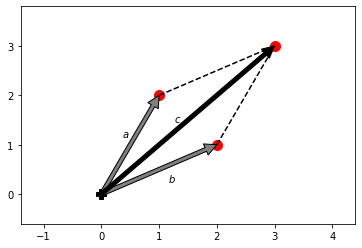

In [67]:
a = np.array([1, 2])
b = np.array([2, 1])
c = a + b
plt.annotate('', xy=a, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=b, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=c, xytext=(0, 0), arrowprops=black)
plt.plot(0, 0, 'kP', ms=10)
plt.plot(a[0], a[1], 'ro', ms=10)
plt.plot(b[0], b[1], 'ro', ms=10)
plt.plot(c[0], c[1], 'ro', ms=10)
plt.plot([a[0], c[0]], [a[1], c[1]], 'k--')
plt.plot([b[0], c[0]], [b[1], c[1]], 'k--')
plt.text(0.35, 1.15, "$a$")
plt.text(1.15, 0.25, "$b$")
plt.text(1.25, 1.45, "$c$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.4, 4.4)
plt.ylim(-0.6, 3.8)
plt.show()

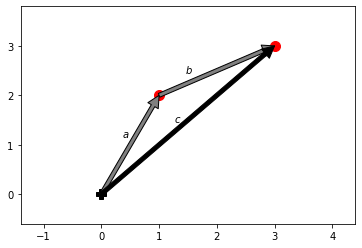

In [68]:
a = np.array([1, 2])
b = np.array([2, 1])
c = a + b
plt.annotate('', xy=a, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=c, xytext=a, arrowprops=gray)
plt.annotate('', xy=c, xytext=(0, 0), arrowprops=black)
plt.plot(0, 0, 'kP', ms=10)
plt.plot(a[0], a[1], 'ro', ms=10)
plt.plot(c[0], c[1], 'ro', ms=10)
plt.text(0.35, 1.15, "$a$")
plt.text(1.45, 2.45, "$b$")
plt.text(1.25, 1.45, "$c$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.4, 4.4)
plt.ylim(-0.6, 3.8)
plt.show()

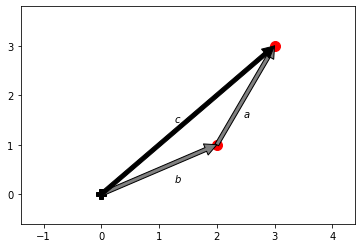

In [69]:
a = np.array([1, 2])
b = np.array([2, 1])
c = a + b
plt.annotate('', xy=b, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=c, xytext=b, arrowprops=gray)
plt.annotate('', xy=c, xytext=(0, 0), arrowprops=black)
plt.plot(0, 0, 'kP', ms=10)
plt.plot(b[0], b[1], 'ro', ms=10)
plt.plot(c[0], c[1], 'ro', ms=10)
plt.text(2.45, 1.55, "$a$")
plt.text(1.25, 0.25, "$b$")
plt.text(1.25, 1.45, "$c$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.4, 4.4)
plt.ylim(-0.6, 3.8)
plt.show()

#### 벡터의 선형조합

지금까지 벡터의 스칼라곱이 어떤 새로운 벡터가 되고 두 벡터의 합이 어떤 새로운 벡터가 되는지 살펴보았다. 여러 개의 벡터를 스칼라곱을 한 후 더한 것을 선형조합이라고 한다.

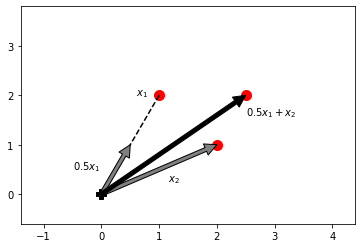

In [70]:
x1 = np.array([1, 2])
x2 = np.array([2, 1])
x3 = 0.5 * x1 + x2
plt.annotate('', xy=0.5*x1, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=x2, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=x3, xytext=(0, 0), arrowprops=black)
plt.plot(0, 0, 'kP', ms=10)
plt.plot(x1[0], x1[1], 'ro', ms=10)
plt.plot(x2[0], x2[1], 'ro', ms=10)
plt.plot(x3[0], x3[1], 'ro', ms=10)
plt.plot([x1[0], 0], [x1[1], 0], 'k--')
plt.text(0.6, 2.0, "$x_1$")
plt.text(-0.5, 0.5, "$0.5x_1$")
plt.text(1.15, 0.25, "$x_2$")
plt.text(2.5, 1.6, "$0.5x_1 + x_2$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.4, 4.4)
plt.ylim(-0.6, 3.8)
plt.show()

#### 유클리드 거리

두 벡터가 가르키는 점 사이의 거리를 __유클리드 거리__ 라고 한다. 두 벡터의 유킬리드 거리는 __벡터의 차의 길이__ 로 구할 수 있다.


$\begin{align}
\begin{aligned} 
\| a - b \|
&= \sqrt{\sum_{i=1} (a_i - b_i)^2} \\
&= \sqrt{\sum_{i=1} ( a_i^2 - 2 a_i b_i + b_i^2 )} \\
&= \sqrt{\sum_{i=1} a_i^2 + \sum_{i=1} b_i^2 - 2 \sum_{i=1} a_i b_i} \\
&= \sqrt{\| a \|^2 + \| b \|^2  - 2 a^Tb }
\end{aligned}
\tag{3.1.13}
\end{align}$

$\begin{align}
\| a - b \|^2 = \| a \|^2 + \| b \|^2 - 2 a^T b
\tag{3.1.14}
\end{align}$

#### 벡터의 내적과 삼각함수

두 벡터의 내적은 다음처럼 벡터의 길이 ||a||,||b||와 두 벡터 사이의 각도 코사인 함수값을 계산할 수도 있다.

\begin{align}
a^Tb = \|a\|\|b\| \cos\theta
\tag{3.1.15}
\end{align}

In [73]:
a = np.array([1,1])
b = np.array([-1,1])
a @ b

0

### 코사인 유사도

두 벡터의 방향이 비슷할수록 벡터가 비슷하다고 간주하여 두 벡터 사이의 각의 코사인값을 __코사인 유사도__ 라고 한다. 코사인값은 각도가 0일때 가장 커지므로 두 벡터가 같은 방향을 가리키고 있으면 코사인 유사도가 최대값 1을 가진다.

$\begin{align}
\text{cosine similarity} = \cos\theta = \dfrac{x^Ty}{\|x\|\|y\|}
\tag{3.1.33}
\end{align}$

#### 투영성분과 직교성분

벡터 a를 다른 벡터 b에 직교하는 성분과 벡터 b에 평행한 성분으로도 분해할 수 있는데, 평행한 성분을 벡터b에 대한 __투영성분(projection),__ 벡터 b 에 직교하는 성분을 벡터 b에 대한 __직교성분(rejection)__ 이라고 하며 각각 다음과 같이 표기한다.

$\begin{align}
a^{\Vert b} 
\tag{3.1.37} 
\end{align}


\begin{align}
a^{\perp b} 
\tag{3.1.38} 
\end{align}$

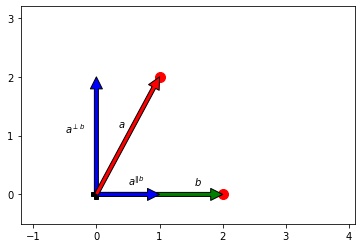

In [75]:
a = np.array([1, 2])
b = np.array([2, 0])
a2 = (a @ b) / np.linalg.norm(b) * np.array([1, 0])
a1 = a - a2
plt.annotate('', xy=b, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=a2, xytext=(0, 0), arrowprops=blue)
plt.annotate('', xy=a1, xytext=(0, 0), arrowprops=blue)
plt.annotate('', xy=a, xytext=(0, 0), arrowprops=red)
plt.plot(0, 0, 'kP', ms=10)
plt.plot(a[0], a[1], 'ro', ms=10)
plt.plot(b[0], b[1], 'ro', ms=10)
plt.text(0.35, 1.15, "$a$")
plt.text(1.55, 0.15, "$b$")
plt.text(-0.5, 1.05, "$a^{\perp b}$")
plt.text(0.50, 0.15, "$a^{\Vert b}$")
plt.xticks(np.arange(-10, 10))
plt.yticks(np.arange(-10, 10))
plt.xlim(-1.2, 4.1)
plt.ylim(-0.5, 3.2)
plt.show()

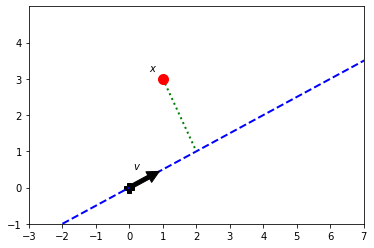

In [76]:
v = np.array([2, 1]) / np.sqrt(5)
x = np.array([1, 3])
plt.plot(0, 0, 'kP', ms=10)
plt.annotate('', xy=v, xytext=(0, 0), arrowprops=black)
plt.plot([-2, 8], [-1, 4], 'b--', lw=2)
plt.plot([1, 2], [3, 1], 'g:', lw=2)
plt.plot(x[0], x[1], 'ro', ms=10)
plt.text(0.1, 0.5, "$v$")
plt.text(0.6, 3.2, "$x$")
plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 7)
plt.ylim(-1, 5)
plt.show()

#### 직선의 방정식

어떤 벡터 w가 있을떄

- 원점에서 출발한 벡터 w가 가리키는 점을 지나면서
- 벡터 w에 수직인

직선의 방정식을 구해보자


위 두 조건을 만족하는 직선 상의 임의의 점을 가리키는 벡터를 x라고 하면, 벡터 x가 가리키는 점과 벡터 w가 가리키는 점을 이은 벡터 x - w는 조건에 따라 벡터 w와 직교해야 한다. 따라서 다음 식이 성립한다.


$\begin{align}
w^T(x - w) = 0
\tag{3.1.45}
\end{align}$

정리하면
$\begin{align}
w^T(x - w) = w^Tx - w^Tw = w^Tx - \| w \|^2
\tag{3.1.46}
\end{align}$

이 직선과 원점 사이의 거리는 벡터 $w의 ||w||이다.$

$||w||$

Font 'default' does not have a glyph for '\ubca1' [U+bca1], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud130' [U+d130], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc9c1' [U+c9c1], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc120' [U+c120], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ubca1' [U+bca1], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\ud130' [U+d130], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc9c1' [U+c9c1], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\uc120' [U+c120], substituting with a dummy symbol.


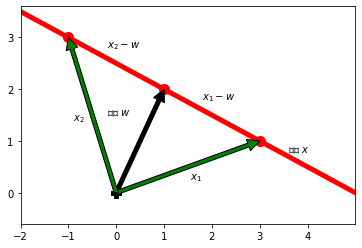

In [78]:
w = np.array([1, 2])
x1 = np.array([3, 1])
x2 = np.array([-1, 3])
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=black)
plt.annotate('', xy=x1, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=x2, xytext=(0, 0), arrowprops=green)
plt.plot(0, 0, 'kP', ms=10)
plt.plot(w[0], w[1], 'ro', ms=10)
plt.plot(x1[0], x1[1], 'ro', ms=10)
plt.plot(x2[0], x2[1], 'ro', ms=10)
plt.plot([-3, 5], [4, 0], 'r-', lw=5)
plt.text(-0.2, 1.5, "벡터 $w$")
plt.text(1.55, 0.25, "$x_1$")
plt.text(-0.9, 1.40, "$x_2$")
plt.text(1.8, 1.8, "$x_1 - w$")
plt.text(-0.2, 2.8, "$x_2 - w$")
plt.text(3.6, 0.8, "직선 $x$")
plt.xticks(np.arange(-2, 5))
plt.yticks(np.arange(-1, 5))
plt.xlim(-2, 5)
plt.ylim(-0.6, 3.6)
plt.show()

#### 직선과 점의 거리

$\begin{align}
\dfrac{\left|w^Tx' - w_0 \right|}{\|w\|} 
\tag{3.1.61}
\end{align}$

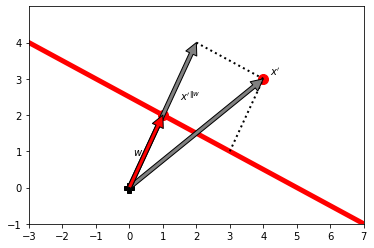

In [79]:
w = np.array([1, 2])
x1 = np.array([4, 3])
x2 = np.array([1, 2]) * 2
plt.annotate('', xy=x1, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=x2, xytext=(0, 0), arrowprops=gray)
plt.annotate('', xy=w, xytext=(0, 0), arrowprops=red)
plt.plot(0, 0, 'kP', ms=10)
plt.plot(w[0], w[1], 'ro', ms=10)
plt.plot(x1[0], x1[1], 'ro', ms=10)
plt.plot([-3, 7], [4, -1], 'r-', lw=5)
plt.plot([2, 4], [4, 3], 'k:', lw=2)
plt.plot([3, 4], [1, 3], 'k:', lw=2)
plt.text(0.1, 0.9, "$w$")
plt.text(4.2, 3.1, "$x'$")
plt.text(1.5, 2.4, "$x'^{\Vert w}$")
plt.xticks(np.arange(-3, 15))
plt.yticks(np.arange(-1, 5))
plt.xlim(-3, 7)
plt.ylim(-1, 5)
plt.show()

#### 선형 종속과 선형 독립



#### 선형 종속인 경우

벡터가 선형종속이 되는 대표적인 세 경우를 알아보자. 예측모형을 만들기 위한 특징행렬 X의 열벡터들이 선형종속이거나 선형종속에 가까운 현상을 __다중공선성__ 이라고 부른다. 다중공선성이 발생하면 예측의 성능이 나빠지므로 되도록 이러한 경우가 발생하지 않도록 주의해야 한다.

#### 랭크

행렬의 열벡터 중 서로 독립인 열벡터의 최대개수를 열랭크 라고 하고 행벡터 중 서로 독립인 행벡터의 최대 개수를 행래크 라고 한다. 행랭크와 열랭크에 대해서는 다음 정리가 성립한다
##### __[정리]__ 행랭크와 열랭크는 항상 같다.

#### 벡터공간과 기저벡터

여러 벡터를 선형조합을 하면 다른 벡터를 만들 수 있다. 벡터 N개가 서로 선형독립이면 이 벡터들을 선형조합하여 만들어지는 모든 벡터의 집합을 __벡터공간(vector space)__ V 라고 하고 이 벡터공간의 차원을 N 이라고 한다. 그리고 그 벡터들을 벡터공간의 __기저벡터(basis vector)__ 라고 한다.

벡터공간의 차원(dimension)이 벡터의 차원(길이)가 아니라 __기저벡터의 개수__로 정의된다는 점에 유의해야 한다.

N차원 N개 x1,x2,...,xn이 선형독립인 경우에는 다음 정리가 성립한다.
#### [정리] N개의 N차원 벡터 x1,x2,...,xn이 선형 독립이면 이를 선형조합하여 모든 N차원 벡터를 만들수 있다.

#### 랭크와 역행렬

정방행렬의 랭크와 역행렬 사이에는 다음과 같은 정리가 성립한다.

#### [정리] 정방행렬이 풀랭크면 역행렬이 존재한다. 역도 성립한다. 즉, 정방행렬의 역행렬이 존재하면 풀랭크다.


따라서 두 문장은 같은 뜻이다.

### 정방행렬이 풀랭크다 <-> 역행렬이 존재한다

#### 벡터공간 투영

M개의 N 차원 기저벡터 v1,v2,...,vm가 존재한다고 하자. m은 n보다 작다. 이 때 모든 N 차원 벡터 x에 대해 기저벡터 v1,v2,...,vm를 선형조합하여 만든 벡터 x^||v 와 원래 벡터 x의 차 x-x^||v가 모든 기저벡터에 직교하면 그 벡터 x^||v를 v1,v2,..,vm __벡터공간에 대한 투영벡터__ 라 하고 차이 벡터 x - x^||v = x직교v를 __벡터공간에 대한 직교벡터__ 라 한다.

#### 표준기저벡터

기저벡터 중에서도 원소중 하나만 값이 1 이고 다른 값은 0 으로 이루저니 다음과 같은 기저벡터를 __표준기저벡터__ 라고 한다.

#### 좌표

어떤 벡터의 __좌표__ 는 기저벡터를 선형조합하여 그 벡터를 나타내기 위한 계수벡터를 말한다.


In [80]:
import matplotlib.pylab as plt

gray = {"facecolor": "gray"}
black = {"facecolor": "black"}
red = {"facecolor": "red"}
green = {"facecolor": "green"}
blue = {"facecolor": "blue"}
lightgreen = {"facecolor": "lightgreen"}

#### 변환행렬

원래의 기저벡터가 아닌 새로운 기저벡터가 있다고 하자. 이 새로운 기저벡터들의 기존 기저벡터에 대한 좌표를 열벡터로 보고 이를 행렬로 묶은 행렬 A를 생각하자.

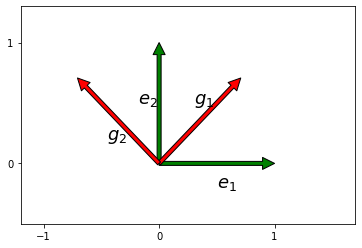

In [81]:
e1 = np.array([1, 0])
e2 = np.array([0, 1])
a = np.array([2, 2])
g1 = np.array([1, 1]) / np.sqrt(2)
g2 = np.array([-1, 1]) / np.sqrt(2)

plt.annotate('', xy=e1, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=e2, xytext=(0, 0), arrowprops=green)
plt.annotate('', xy=g1, xytext=(0, 0), arrowprops=red)
plt.annotate('', xy=g2, xytext=(0, 0), arrowprops=red)

plt.text(-0.18, 0.5, "$e_2$", fontdict={"size": 18})
plt.text(0.5, -0.2, "$e_1$", fontdict={"size": 18})
plt.text(0.3, 0.5, "$g_1$", fontdict={"size": 18})
plt.text(-0.45, 0.2, "$g_2$", fontdict={"size": 18})

plt.xticks(np.arange(-2, 4))
plt.yticks(np.arange(-1, 4))
plt.xlim(-1.2, 1.7)
plt.ylim(-0.5, 1.3)
plt.show()

#### 좌표변환

새로운 기저벡터에 대한 좌표를 계산하는 것을 __좌표변환__ 이라고 한다.

2차원의 경우를 예로 들어보자. 벡터 x의 기저벡터 {e1, e2}에 대한 좌표를 x_e를 새로운 기저벡터 {g1,g2}에 대한 좌표 x_g로 변환하고자 한다.

새로운 기저벡터에 대한 좌푯값이 가리키는 실제 위치는 원래의 벡터가 가리키는 실제 위치와 같아야 되므로 
$\begin{align}
x = x_{e1}e_1 + x_{e2}e_2 = x_{g1} g_1 + x_{g2} g_2  
\tag{3.2.63}
\end{align}$

#### 즉 새로운 좌표벡터는 원래의 좌표벡터에 변환행렬을 곱하여 구할 수 있다.

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54980 missing from c

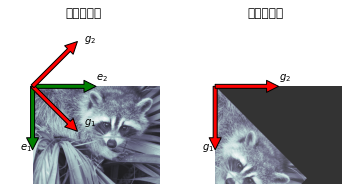

In [84]:
import scipy as sp
import scipy.misc
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib as mpl

f = sp.misc.face(gray=True)

e1 = np.array([0, 1]) # matplotlib의 이미지 좌표규약으로 부호변경 
e2 = np.array([1, 0])
E = np.vstack([e1, e2]).T
g1 = np.array([1, 1]) / np.sqrt(2)
g2 = np.array([-1, 1]) / np.sqrt(2)
A = np.vstack([g1, g2]).T
gc1 = E @ g1
gc2 = E @ g2

plt.subplot(121)
plt.imshow(f, cmap=mpl.cm.bone, alpha=0.9)
plt.annotate('', xy=500*e1, xytext=(0,0), arrowprops=green)
plt.annotate('$e_1$', xy=500*e1, xytext=500*e1 + [-100,0])
plt.annotate('', xy=500*e2, xytext=(0,0), arrowprops=green)
plt.annotate('$e_2$', xy=500*e2, xytext=500*e2 + [0, -50])
plt.annotate('', xy=500*gc1, xytext=(0, 0), arrowprops=red)
plt.annotate('$g_1$', xy=500*gc1, xytext=500*gc1 + [50, -50])
plt.annotate('', xy=500*gc2, xytext=(0, 0), arrowprops=red)
plt.annotate('$g_2$', xy=500*gc2, xytext=500*gc2 + [50, 0])
plt.axis("off")
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title("좌표변환전")

f1 = sp.ndimage.affine_transform(f, A)

plt.subplot(122)
plt.imshow(f1, cmap=mpl.cm.bone, alpha=0.8)
plt.annotate('', xy=500*e1, xytext=(0,0), arrowprops=red)
plt.annotate('$g_1$', xy=500*e1, xytext=500*e1 + [-100,0])
plt.annotate('', xy=500*e2, xytext=(0,0), arrowprops=red)
plt.annotate('$g_2$', xy=500*e2, xytext=500*e2 + [0, -50])
plt.axis("off")
plt.xlim(-200, 1000)
plt.ylim(800, -500)
plt.title("좌표변환후")
plt.show()

### 고유값 개수

N차 방정식이 항상 N개의 복소수 해를 가진다는 사실을 이용하면 N차원 정방행렬의 고유값에 대해 다음 정리가 성립한다.

#### [정리] 중복된 고유값을 가각ㄱ 별개로 생각하고 복소수인 고유값도 고려한다면,  N차원 정발행렬의 고유값은 항상 N개다.

#### 고유값과 대각합/행렬식
모든 고유값의 곱은 행렬식의 값과 같고 모든 고유값의 합은 대ㄱㅇ개.......

### 대각화가능

#### [정리] 행렬이 대각화가능하려면 고유벡터가 선형독립이어야 한다.

행렬을 대각화할 수 있으면 __대각화가능 행렬__ 이라고 한다.

### 고유값과 역행렬

#### [정리] 대각화가능한 행렬에 0인 고유값이 없으면 항상 역행렬이 존재한다.

### 대칭행렬의 고유분해

#### [정리] 행렬 A가 실수인 대칭행렬이면 고유값이 실수이고 고유벡터는 서로 직교한다.

만약 고유벡터들이 크기가 1이 되도록 정규화된 상태라면 고유벡터 행렬 V는 정규직교 행렬이므로 __전치행렬이 역행렬__ 이다.

#### [정리] 실수인 대칭행렬은 항상 대각화 가능하다.

__만약 0 인 고유값이 없다면__ 역행렬도 다음처럼 N개의 랭크-1 행렬 A_i = v_1 v_1^T 

#### 대칭행렬의 고유값 부호

[정리] 대칭해열ㄹ이 양의 정부호이면 고유값도 야과정이빈다

## 요약 : 고유분해의 성질

N 차원 정방행렬 A에 대해

1. 행렬 A는 N 개의 고유값-고유벡터를 가진다.
2. 행렬의 __대각합은 모든 고유값의 합__ 과 같다.
3. 행렬의 __행렬식은 모든 고유값의 곱__ 과 같다.
4. 행렬 A가 __대칭행렬__ 이면 N 개의 __실수 고유값__ 을 가지며 고유 벡터들이 서로 __직교__ 이다.
5. 행렬 A가 __대칭행렬__ 이고 고유값이 모두  __양수__ 이면 __양의 정부호__이고 역행렬이 존재한다__ . 역도 성립한다.
6. 행렬 A가 어떤 행렬 X의 __분산행렬 $X^TX$이면 0또는 양의 고유값을 가진다.
7. 행렬 $ X\in\mathbf{R}^{N\times M} (N\geq M)$__가 풀랭크이면 분산행렬 $X^TX$은 역행렬이 존재__ 한다.

#### K차원 근사

#### 가장 큰 K개의 특이값에 대응하는 오른쪽 특이벡터가 기저벡터일 때 가장 값이 커진다.

# PCA 

N개의 M차원 데이터가 있으면 보통 그 데이터들은 서로 다른 값을 가진다. 하지만 이러한 데이터 간의 변이(variation)는 무작위가 아니라 특정한 규칙에 의해 만들어지는 경우가 있다. 예를 들어 붓꽃의 꽃받침 길이는 꽃마다 다르지만 꽃받침 길이가 약 2배 커지면 꽃받침 폭도 약 2배 커지는 것이 일반적이다. 이러한 데이터 간의 변이 규칙을 찾아낼때 PCA를 이용할 수 있다.

__PCA(Principal Component Analysis)는 주성분 분석__ 이라고도 하며 고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원 데이터를 찾아내는 방법이다. __차원축소(dimention rediction)__ 라고도 한다. 더 낮은 차원의 데이터값 변화가 더 높은 차원의 데이터 값 변화를 설명할 수이 ㅆ다는 것은 얼핏 보기에 복잡해 보이는 고차원 데이터의 변이를 몇가지 원인으로 설명할 수 있다는 뜻이다.



C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from c

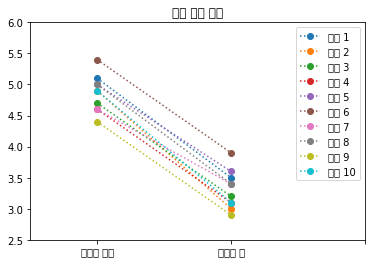

In [85]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

plt.plot(X.T, 'o:')
plt.xticks(range(4), ["꽃받침 길이", "꽃받침 폭"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("붓꽃 크기 특성")
plt.legend(["표본 {}".format(i + 1) for i in range(N)])
plt.show()

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48531 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from c

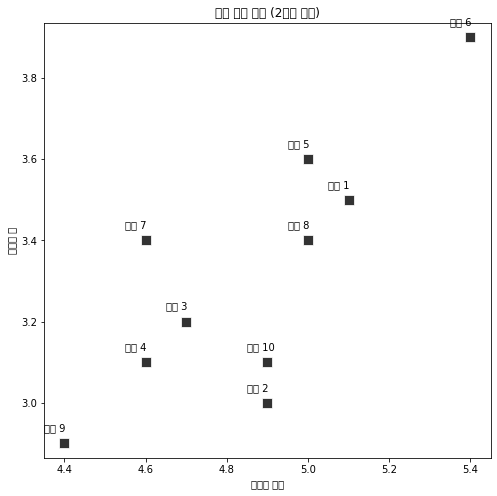

In [88]:
import seaborn as sns
import pandas as pd
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "표본 {}".format(i + 1))
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 특성 (2차원 표시)")
plt.axis("equal")
plt.show()


바로 측정되지는 않지만 측정된 데이터의 기저에 숨어서 측정 데이터를 결정짓는 데이터를 __잠재변수(latent variable)__ 이라고 부른다.

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45936 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from c

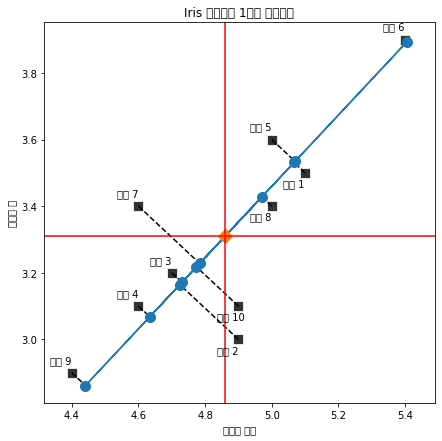

In [89]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X)
X2 = pca1.inverse_transform(X_low)

plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44404 missing from c

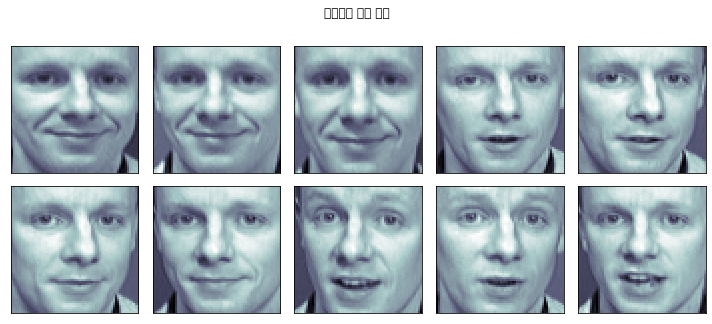

In [90]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20  # 20번 인물의 사진만 선택
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

In [91]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49437 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from c

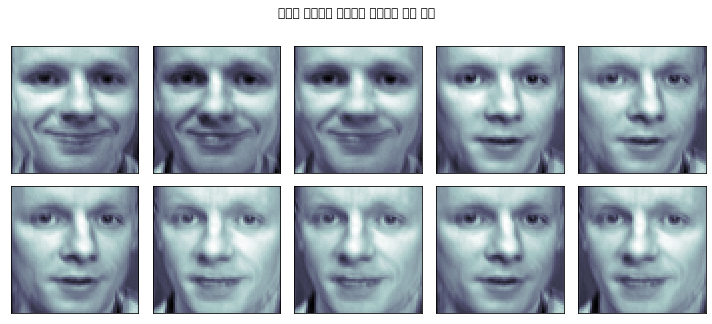

In [92]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(X32[k].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("주성분 분석으로 근사화한 올리베티 얼굴 사진")
plt.tight_layout()
plt.show()

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0, flags=flags)


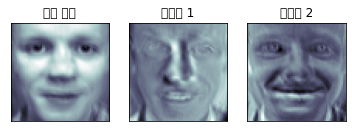

In [93]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45908 missing from c

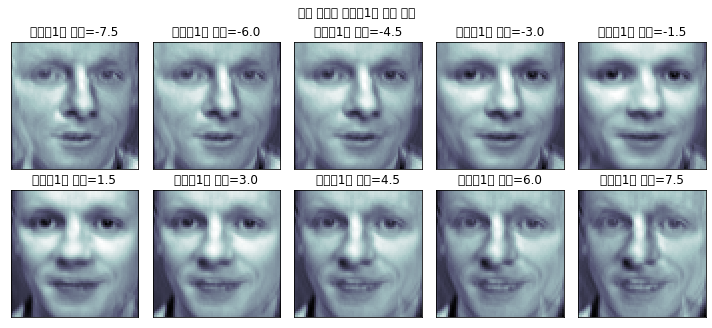

In [94]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4)
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진")
plt.tight_layout()
plt.show()


In [96]:
import sympy
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
f

exp((-mu + x)**2/sigma**2)

In [97]:
sympy.diff(f,x,x)

2*(1 + 2*(mu - x)**2/sigma**2)*exp((mu - x)**2/sigma**2)/sigma**2

In [98]:
x, y = sympy.symbols('x y')
f = x ** 2 + 4 * x * y + 4 * y ** 2
f

x**2 + 4*x*y + 4*y**2

In [99]:
sympy.diff(f,x,y)

4

In [100]:
sympy.init_printing(use_latex='mathjax')

x = sympy.symbols('x')

f = x * sympy.exp(x) + sympy.exp(x)
f

   x    x
x⋅ℯ  + ℯ 

In [101]:
sympy.integrate(f)

   x
x⋅ℯ 